# Data Preparation 
- [7-steps-mastering-data-preparation-python](http://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html?utm_content=buffere0216&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer)
 - Step 1: Preparing for the Preparation
 - Step 2: Exploratory Data Analysis
 - Step 3: Dealing with Missing Values
 - Step 4: Dealing with Outliers
 - Step 5: Dealing with Imbalanced Data
 - Step 6: Data Transformations
 - Step 7: Finishing Touches & Moving Ahead
 
 

In [84]:
import pymysql
import redis

#redis connection
r = redis.StrictRedis(host='172.17.0.2', port=6379, db=0)

#connect maria rdb
db = pymysql.connect(
        host='172.17.0.4',
        user='root',
        passwd='1234',
        db='rental',
        charset='utf8mb4'
    )
#設置cursor
cursor = db.cursor()
#cursor.execute('SELECT * FROM typeID;')

In [85]:
import numpy as np
import pandas as pd
import pandas_profiling

cursor.execute('SELECT ID, cityID, pet, rent, space , lat, lng , label, floor FROM rentInfo;')
#dtype_dict = { "rent":np.int32, "space":np.float64, "lat":np.float64, "lng":np.float64}
df = pd.DataFrame(list(cursor.fetchall()),
                 columns = ["ID", "cityID", "pet", "rent", "space", "lat", "lng","label","floor"])
cursor.close()
# df.columns = ["ID", "cityID", "pet", "rent", "space", "lat", "lng","label"]

In [86]:
df.dtypes

ID         int64
cityID     int64
pet       object
rent       int64
space     object
lat       object
lng       object
label     object
floor      int64
dtype: object

In [87]:
df.loc[:,["space", "lat", "lng"]] = df.loc[:,["space", "lat", "lng"]].astype(np.float64)

In [88]:
df.dtypes

ID          int64
cityID      int64
pet        object
rent        int64
space     float64
lat       float64
lng       float64
label      object
floor       int64
dtype: object

In [89]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("/tmp/rentInfo.html")
pfr

Number of variables,9
Number of observations,24799
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,72.0 B
Numeric,6
Categorical,2
Date,0
Text (Unique),0
Rejected,1
Distinct count,24799


# geo lacation
主要是一些因為過期等因素抓取失敗的  
range:lng:[121.29,122.00]  
      lat:[24.68,25.29]  

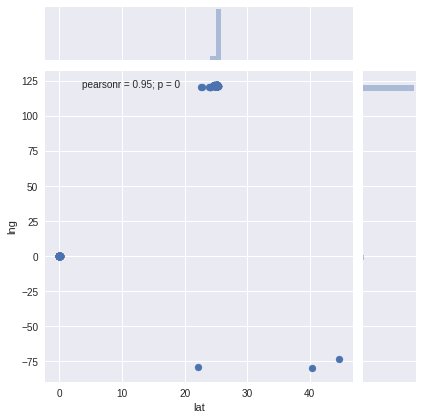

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# sns.distplot(y, hist=True)
sns.jointplot(x="lat", y="lng", data=df);

In [71]:
#outline data
print(df.shape)
df = df[df.lng>121]
print(df.shape)
#GeoLocation is ok
print(df[df.lng<122].shape)
print(df[df.lat>24].shape)
print(df[df.lat<26].shape)

(24799, 8)
(24648, 8)
(24648, 8)
(24648, 8)
(24648, 8)


In [72]:
(24799-24648)/24799

0.006088955199806444

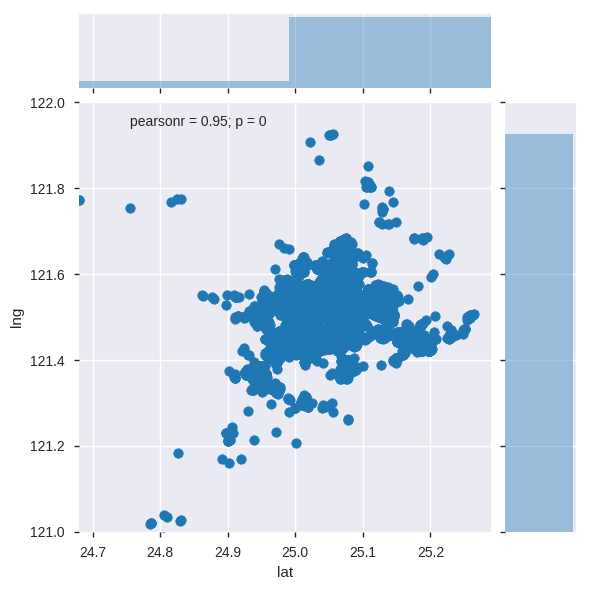

In [90]:
sns.jointplot(x="lat", y="lng", data=df,
              ylim=[121.0,122.00], xlim=[24.68,25.29]);

# label


In [91]:
df.groupby('label').count().ID

label
NA       48
住      5677
套     18658
雅       416
Name: ID, dtype: int64

In [93]:
df.groupby('label').describe()

ID        cityID         floor           lat  \
label                                                                 
NA    count     48.000000     48.000000     48.000000     48.000000   
      mean    2035.354167    126.291667      0.666667     25.089396   
      std      430.793355     42.815765      1.938779      0.047611   
      min      910.000000    100.000000      0.000000     24.976098   
      25%     1783.000000    111.000000      0.000000     25.051548   
      50%     2177.500000    111.000000      0.000000     25.108386   
      75%     2354.250000    114.000000      1.000000     25.132344   
      max     2567.000000    247.000000     13.000000     25.145312   
住     count   5677.000000   5677.000000   5677.000000   5677.000000   
      mean    4019.146204    163.393870      6.064647     25.063102   
      std     2499.102752    342.148645      4.882071      0.065527   
      min        1.000000    100.000000      0.000000     22.652541   
      25%     1686.000000    106.000000      2.000000     25.031987   
      50%     4083.000000    111.000000      5.000000     25.056493   
      75%     6179.000000    235.000000      9.000000     25.087253   
      max     8532.000000  10491.000000     56.000000     25.260501   
套     count  18658.000000  18658.000000  18658.000000  18658.000000   
      mean   15144.867617    168.257369      5.392218     24.866622   
      std     5970.862167     65.528579      4.268195      2.158397   
      min        4.000000      0.000000     -2.000000      0.000000   
      25%    10806.250000    106.000000      3.000000     25.018587   
      50%    15470.500000    115.000000      4.000000     25.048174   
      75%    20134.750000    236.000000      7.000000     25.077265   
      max    24799.000000    815.000000     40.000000     44.625102   
雅     count    416.000000    416.000000    416.000000    416.000000   
      mean    4856.418269    162.612981      3.641827     25.071403   
      std     2290.380469     64.627695      2.708146      0.752360   
      min      309.000000    100.000000      0.000000     23.894175   
      25%     2956.250000    108.000000      2.000000     25.005859   
      50%     4651.000000    115.500000      3.000000     25.034833   
      75%     7261.500000    231.000000      5.000000     25.067124   
      max     8451.000000    526.000000     31.000000     40.300981   

                      lng          rent         space  
label                                                  
NA    count     48.000000  4.800000e+01     48.000000  
      mean     121.538900  1.177018e+05     97.220000  
      std        0.042541  6.938974e+04     51.017010  
      min      121.375148  8.500000e+03     16.890000  
      25%      121.519848  7.725000e+04     53.710000  
      50%      121.551214  1.000000e+05     95.890000  
      75%      121.563385  1.500000e+05    133.750000  
      max      121.599692  2.800000e+05    242.000000  
住     count   5677.000000  5.677000e+03   5677.000000  
      mean     121.513351  4.535703e+05     38.841818  
      std        0.065477  1.070067e+07    246.998399  
      min      120.284290  0.000000e+00      0.000000  
      25%      121.481443  2.500000e+04      0.000000  
      50%      121.525527  4.000000e+04     30.000000  
      75%      121.547618  6.700000e+04     50.430000  
      max      121.816932  5.000000e+08  18000.000000  
套     count  18658.000000  1.865800e+04  18658.000000  
      mean     120.584232  2.610028e+04     21.717346  
      std       10.644231  3.286765e+04     22.674483  
      min      -78.957017  0.000000e+00      0.000000  
      25%      121.464952  8.500000e+03      7.000000  
      50%      121.519338  1.500000e+04     12.000000  
      75%      121.546637  3.000000e+04     30.000000  
      max      121.925761  6.000000e+05    330.000000  
雅     count    416.000000  4.160000e+02    416.000000  
      mean     121.042991  6.135990e+03      8.739808  
      std        9.856976  3.539906e+03 

# space

In [102]:
df.space.describe()

count    24799.000000
mean        25.565933
std        120.102495
min          0.000000
25%          6.000000
50%         14.870000
75%         36.000000
max      18000.000000
Name: space, dtype: float64

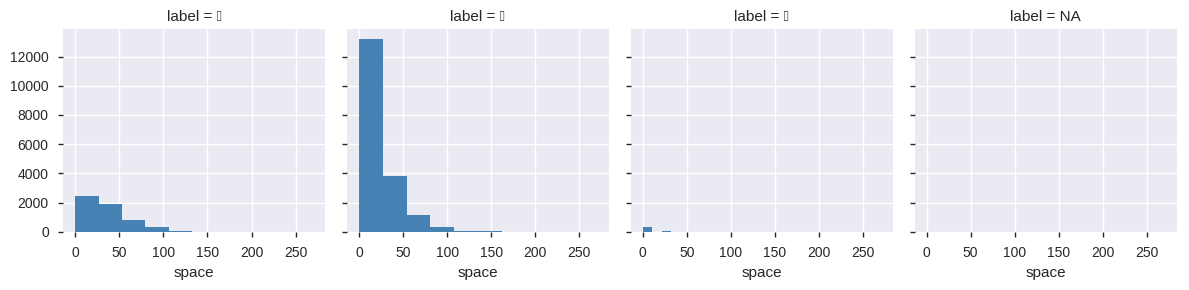

In [105]:
#
g = sns.FacetGrid(df[df.space<300], col="label", margin_titles=True)
g.map(plt.hist, "space", color="steelblue")

In [106]:
df[df.space<0.1].shape

(1804, 9)

In [117]:
for i in range(100,1000,100):
    print(i, df[df.space>i].count().ID)

100 417
200 26
300 8
400 5
500 5
600 4
700 4
800 4
900 4


In [172]:
df = df[df.space>0.1]
df[df.space<0.1].shape

(0, 9)

In [173]:
df = df[df.space<100]
df[df.space>100].shape

(0, 9)

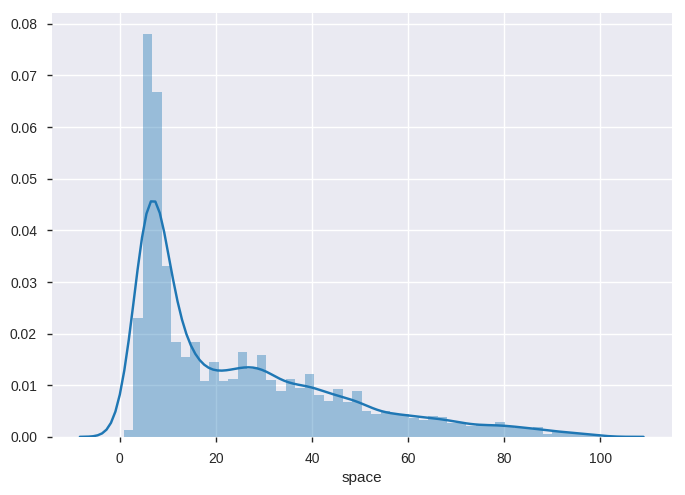

In [174]:
sns.distplot(df[df.space<100].space ,bins=50)

# rent

In [176]:
df.describe(percentiles=[0.05, 0.1, 0.27, 0.73, 0.9, 0.95]).rent

count    2.254000e+04
mean     1.012869e+05
std      4.247737e+06
min      0.000000e+00
5%       5.000000e+03
10%      6.500000e+03
27%      9.500000e+03
50%      1.800000e+04
73%      3.400000e+04
90%      6.500000e+04
95%      8.800000e+04
max      5.000000e+08
Name: rent, dtype: float64

In [232]:
df[df.rent>=130000].shape

(359, 9)

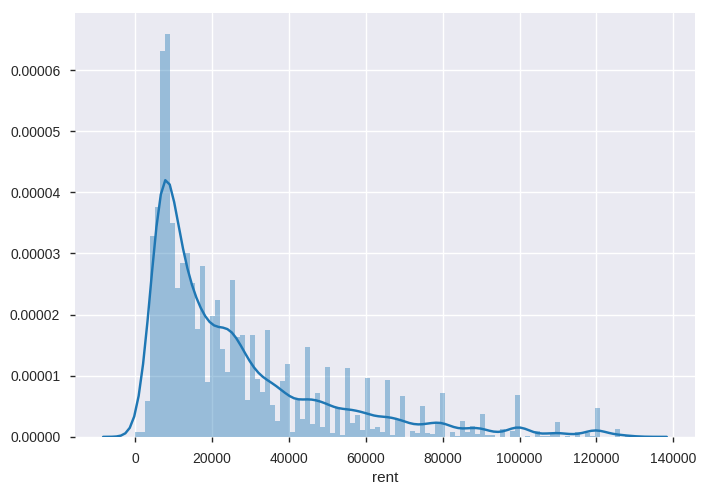

In [231]:
sns.distplot(df[df.rent<130000].rent ,bins=100)

In [233]:
df = df[df.rent<130000]
df[df.rent>=130000].shape

(0, 9)

In [260]:
df = df[df.rent>2000]
df[df.rent<=20000].shape

(12206, 10)

In [266]:
df["rent"].divide(df["space"]).describe()

count    22152.000000
mean      1257.559222
std        604.250844
min         75.075075
25%        875.000000
50%       1171.733541
75%       1555.555556
max      25000.000000
dtype: float64

In [267]:
df['unit'] = df["rent"].divide(df["space"])

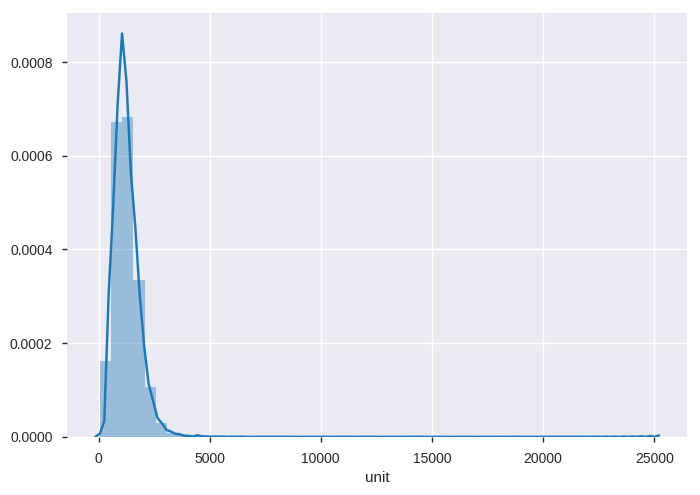

In [269]:
sns.distplot(df.unit)

In [291]:
df = df[df['unit']<3500]
df[df.unit>3500].shape

(0, 10)

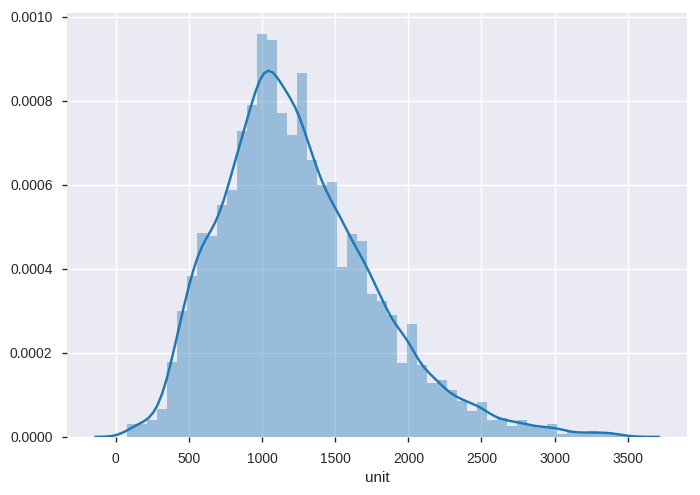

In [292]:
sns.distplot(df.unit)

In [294]:
df.to_csv('./170910_backup_geo_unit.csv')

# pet cityID label

In [309]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [303]:
yn = {'Y':1,'N':0}
df.loc[:,"pet"] = df.loc[:,"pet"].map(lambda x: yn[x])

In [308]:
df.pet.unique()

array([0, 1])

In [310]:
le.fit(df.label)

LabelEncoder()

In [311]:
le.classes_

array(['NA', '住', '套', '雅'], dtype=object)

In [312]:
le.transform(df.label)

array([1, 1, 1, ..., 2, 2, 2])

In [313]:
df["lebal_encoding"] = le.transform(df.label)

In [314]:
df.columns

Index(['ID', 'cityID', 'pet', 'rent', 'space', 'lat', 'lng', 'label', 'floor',
       'unit', 'lebal_encoding'],
      dtype='object')